# Homework 2: Regression 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from scipy import stats
from sklearn import linear_model
from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_squared_error, r2_score

%matplotlib inline

In [2]:
Elements = pd.read_csv('https://gist.githubusercontent.com/GoodmanSciences/c2dd862cd38f21b0ad36b8f96b4bf1ee/raw/1d92663004489a5b6926e944c1b3d9ec5c40900e/Periodic%2520Table%2520of%2520Elements.csv')

In [3]:
Elements

,AtomicNumber,Element,Symbol,AtomicMass,NumberofNeutrons,NumberofProtons,NumberofElectrons,Period,Group,Phase,...,FirstIonization,Density,MeltingPoint,BoilingPoint,NumberOfIsotopes,Discoverer,Year,SpecificHeat,NumberofShells,NumberofValence
0,1,Hydrogen,H,1.007,0,1,1,1,1.0,gas,...,13.5984,0.000090,14.175,20.28,3.0,Cavendish,1766.0,14.304,1,1.0
1,2,Helium,He,4.002,2,2,2,1,18.0,gas,...,24.5874,0.000179,NaN,4.22,5.0,Janssen,1868.0,5.193,1,NaN
2,3,Lithium,Li,6.941,4,3,3,2,1.0,solid,...,5.3917,0.534000,453.850,1615.00,5.0,Arfvedson,1817.0,3.582,2,1.0
3,4,Beryllium,Be,9.012,5,4,4,2,2.0,solid,...,9.3227,1.850000,1560.150,2742.00,6.0,Vaulquelin,1798.0,1.825,2,2.0
4,5,Boron,B,10.811,6,5,5,2,13.0,solid,...,8.2980,2.340000,2573.150,4200.00,6.0,Gay-Lussac,1808.0,1.026,2,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113,114,Flerovium,Fl,289.000,175,114,114,7,14.0,artificial,...,NaN,NaN,NaN,NaN,NaN,NaN,1999.0,NaN,7,4.0
114,115,Moscovium,Mc,288.000,173,115,115,7,15.0,artificial,...,NaN,NaN,NaN,NaN,NaN,NaN,2010.0,NaN,7,5.0
115,116,Livermorium,Lv,292.000,176,116,116,7,16.0,artificial,...,NaN,NaN,NaN,NaN,NaN,NaN,2000.0,NaN,7,6.0
116,117,Tennessine,Ts,295.000,178,117,117,7,17.0,artificial,...,NaN,NaN,NaN,NaN,NaN,NaN,2010.0,NaN,7,7.0


In [4]:
Elements.keys()

Index(['AtomicNumber', 'Element', 'Symbol', 'AtomicMass', 'NumberofNeutrons',
       'NumberofProtons', 'NumberofElectrons', 'Period', 'Group', 'Phase',
       'Radioactive', 'Natural', 'Metal', 'Nonmetal', 'Metalloid', 'Type',
       'AtomicRadius', 'Electronegativity', 'FirstIonization', 'Density',
       'MeltingPoint', 'BoilingPoint', 'NumberOfIsotopes', 'Discoverer',
       'Year', 'SpecificHeat', 'NumberofShells', 'NumberofValence'],
      dtype='object')

In [5]:
qm7b = pd.read_csv('http://faculty.washington.edu/tingcao/wordpress/wp-content/uploads/2020/10/qm7b.csv');
qm7b.head()

,id,ae_pbe0,emax_zindo,imax_zindo,homo_zindo,lumo_zindo,e1_zindo,ip_zindo,ea_zindo,homo_pbe0,...,homo_gw,lumo_gw,p_pbe0,p_scs,n_H,n_C,n_N,n_O,n_S,n_Cl
0,1,-420.933746,39.694626,0.621841,-16.013,4.162,36.768073,15.72523,-3.98613,-10.9488,...,-14.1341,1.0870,2.534576,2.43222,4,1,0,0,0,0
1,2,-718.419189,22.622486,0.628328,-13.549,3.684,11.717433,13.41121,-3.49181,-9.5577,...,-12.5472,1.1186,4.332028,4.44500,6,2,0,0,0,0
2,3,-570.024841,22.940671,0.709060,-10.160,1.231,7.137266,9.75211,-0.82042,-7.8768,...,-10.4383,1.9456,4.173282,3.92308,4,2,0,0,0,0
3,4,-410.286163,15.973798,2.228480,-10.706,2.145,4.624107,10.46577,-1.89847,-8.4021,...,-11.1629,1.1958,3.512394,3.32175,2,2,0,0,0,0
4,5,-868.855408,17.900516,0.556174,-12.365,3.825,10.311655,11.96491,-3.57487,-8.3534,...,-10.8132,1.2002,5.480160,5.78632,6,3,0,0,0,0


In [8]:
qm7b.keys()

Index(['id', 'ae_pbe0', 'emax_zindo', 'imax_zindo', 'homo_zindo', 'lumo_zindo',
       'e1_zindo', 'ip_zindo', 'ea_zindo', 'homo_pbe0', 'lumo_pbe0', 'homo_gw',
       'lumo_gw', 'p_pbe0', 'p_scs', 'n_H', 'n_C', 'n_N', 'n_O', 'n_S',
       'n_Cl'],
      dtype='object')

| Column Name | Unit  |  Description |
|----------|----------|-----------|
|ae_pbe0   |kcal/mol  |Atomization energy (DFT/PBE0)
|p_pbe0    |Angstrom^3|Polarizability (DFT/PBE0)
|p_scs     |Angstrom^3|Polarizability (self-consistent screening)
|homo_gw   |eV        |Highest occupied molecular orbital (GW)
|homo_pbe0 |eV        |Highest occupied molecular orbital (DFT/PBE0)
|homo_zindo|eV        |Highest occupied molecular orbital (ZINDO/s)
|lumo_gw   |eV        |Lowest unoccupied molecular orbital (GW)
|lumo_pbe0 |eV        |Lowest unoccupied molecular orbital (DFT/PBE0)
|lumo_zindo|eV        |Lowest unoccupied molecular orbital (ZINDO/s)
|ip_zindo  |eV        |Ionization potential (ZINDO/s)
|ea_zindo  |eV        |Electron affinity (ZINDO/s)
|e1_zindo  |eV        |First excitation energy (ZINDO)
|emax_zindo|eV        |Maximal absorption intensity (ZINDO)
|imax_zindo|arbitrary |Excitation energy at maximal absorption (ZINDO)
|n_H       |          |number of Hydrogen atoms
|n_C       |          |number of Carbon atoms
|n_N       |          |number of Nitrogen atoms
|n_O       |          |number of Oxygen atoms
|n_S       |          |number of Sulfur atoms
|n_Cl      |          |number of Chlorine atoms

In [9]:
qm7b.shape

(7211, 21)

## Warm-Up (5 points)

Plot a scatter graph of `AtomicNumber` vs. `SpecificHeat`, with Atomic Number on the X axis. Label your axes and title accordingly.

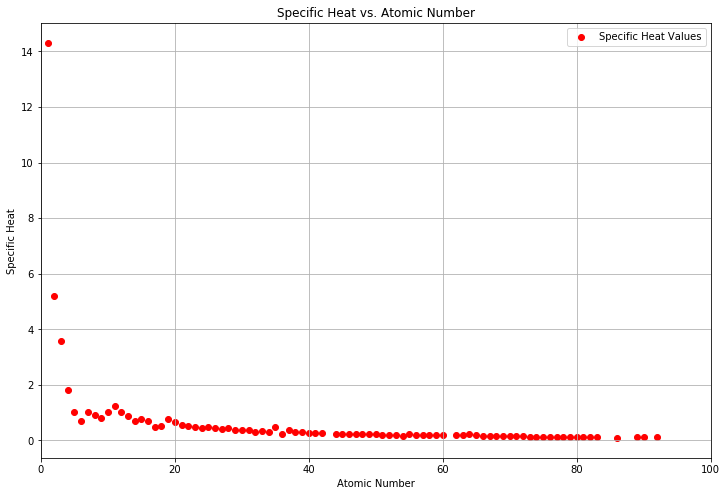

In [10]:
plt.figure(figsize = (12,8))
Elements_sh = Elements.dropna(subset=['SpecificHeat'])
plt.scatter(Elements_sh['AtomicNumber'], Elements_sh['SpecificHeat'], c='r', label = 'Specific Heat Values')
plt.legend()
plt.title('Specific Heat vs. Atomic Number')
plt.xlim(0,100)
plt.ylabel('Specific Heat')
plt.xlabel('Atomic Number')
plt.grid()

## 1. Polynomial Regression (30 points)

*The process flow for performing non-linear regression is essentially the same as that for linear regression. The main distinction lies in the specification of the class of model (Step #1) and model hyperparameters (Step #2). We will be working through some non-linear regressions in this homework. In question 1, we have set up steps 1 and 2 for you.*

- Define a features matrix and target array in preparation for performing a fitting to the Atomic Number vs. Specific Heat plot you plotted above. 
- Experiment with different *degrees* of polynomial fitting (anything <10)
- Experiment with performing different degrees of fitting with `fit(1/X,y)` instead of `fit(X,y)`  

**What is the simplest fitting that gives you an $R^2$ value larger than 0.99? Overlay this plot on the original scatterpoints, and plot a few earlier attemps on the same or different axes, with appropriate labels and a legend.**

In [11]:
##Step 1
from sklearn.preprocessing import PolynomialFeatures

In [132]:
##Step 2
from sklearn.pipeline import make_pipeline
#The number in PolynomialFeatures() specifies the degree of your polynomial fitting
poly_model = make_pipeline(PolynomialFeatures(7),
                           LinearRegression())
poly_model4 = make_pipeline(PolynomialFeatures(4),
                           LinearRegression())
poly_model5 = make_pipeline(PolynomialFeatures(5),
                           LinearRegression())
# poly_model3 = make_pipeline(PolynomialFeatures(8),
#                            LinearRegression())

The simplest fitting that gives an R2 value of >0.99 is a polynomial with degree 7


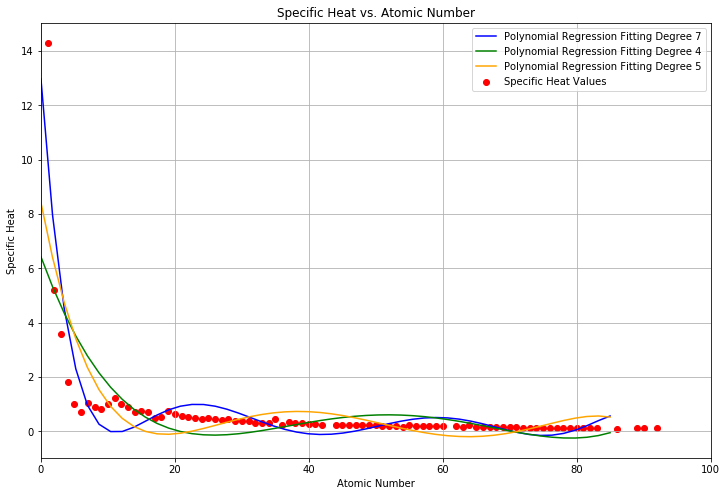

In [133]:
X1 = Elements_sh[['AtomicNumber']]
y1 = Elements_sh['SpecificHeat']
d1 = Elements_sh[['SpecificHeat']]
# #Initializing Plot and Plotting Scatter Values
plt.figure(figsize = (12,8))
Elements_sh = Elements.dropna(subset=['SpecificHeat'])
plt.scatter(Elements_sh['AtomicNumber'], Elements_sh['SpecificHeat'], c='r', label = 'Specific Heat Values')
#Plotting Poly Model 

poly_model.fit(X1,y1)
xfit = np.linspace(0,85)
Xfit = xfit[:, np.newaxis]
yfit = poly_model.predict(Xfit)
plt.plot(xfit, yfit, c='blue', label = 'Polynomial Regression Fitting Degree 7')
#print(r2_score(d1, poly_model.predict(Xfit)))

poly_model4.fit(X1,y1)
yfit = poly_model4.predict(Xfit)
plt.plot(xfit, yfit, c='g', label = 'Polynomial Regression Fitting Degree 4')
#print('R2 Score Degree 4:' + str(r2_score(Elements_sh['SpecificHeat'], poly_model4.predict(Xfit))))

poly_model5.fit(X1,y1)
yfit = poly_model5.predict(Xfit)
plt.plot(xfit, yfit, c='orange', label = 'Polynomial Regression Fitting Degree 5')

#Testing out with 1/X Poly Model
#Keeping it commented out when I don't need it 
# poly_model3.fit(1/X1, y1)
# xfit = np.linspace(0,49)
# Xfit = xfit[:,np.newaxis]
# yfit = poly_model3.predict(Xfit)
# plt.plot(xfit, yfit, c='green', label = 'Polynomial Regression Fitting 1/X')


#Graph Tidyness 
plt.legend()
plt.title('Specific Heat vs. Atomic Number')
plt.xlim(0,100)
plt.ylabel('Specific Heat')
plt.xlabel('Atomic Number')
plt.grid()

print('The simplest fitting that gives an R2 value of >0.99 is a polynomial with degree 7')

## 2. Multilinear Regression (30 points)

Create a target array `gap` for bandgap - the difference between `lumo_zindo` and `homo_zindo`. 

In [7]:
gap = qm7b['lumo_zindo'] - qm7b['homo_zindo']
gap

0       20.175
1       17.233
2       11.391
3       12.851
4       16.190
         ...  
7206    10.203
7207     8.717
7208     8.671
7209     8.466
7210     8.675
Length: 7211, dtype: float64

Perform a multilinear regression of `ip_zindo` and `ea_zindo` to `gap` (`gap` being the target array). Create a parity plot and 3d plot of your modeled vs. original datapoints, then find the $R^2$ value and Mean Squared Error of your fitting. Is this a good fitting?

Text(0.5, 0.92, 'Regression Fitting of ea_zindno vs. IP and EA in Zindo Simulations')

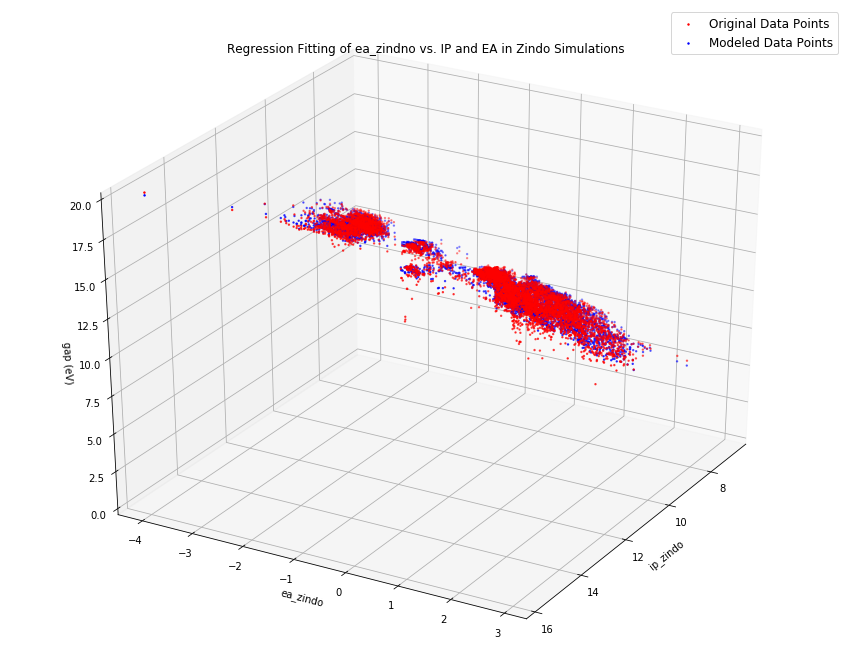

In [19]:
##Multilinear Regression and 3D Plot of Modeled vs. Original Data Points
model2 = linear_model.LinearRegression()
X2 =  qm7b[['ip_zindo','ea_zindo']]
model2.fit(X2, gap)

plt.figure(figsize=(15,12))
ax = plt.axes(projection = '3d')
ax = plt.axes(projection = '3d')
plot1=ax.scatter3D(qm7b['ip_zindo'], qm7b['ea_zindo'], gap, s=2, 
                  c='red', label='Original Data Points') ##red
plot2=ax.scatter3D(qm7b['ip_zindo'], qm7b['ea_zindo'],
                  model2.predict(qm7b[['ip_zindo','ea_zindo']]), c='blue', s=2, 
                  label='Modeled Data Points') #pink
ax.view_init(30,30)
ax.set_xlabel('ip_zindo')
ax.set_ylabel('ea_zindo')
ax.set_zlabel('gap (eV)')
ax.set_zlim(0,20)
ax.legend(fontsize = '12')
ax.set_title('Regression Fitting of ea_zindno vs. IP and EA in Zindo Simulations')

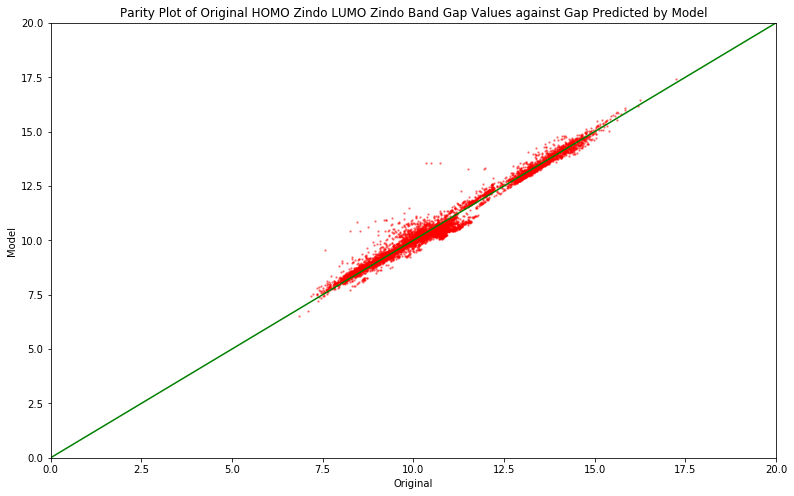

R2 score of this fitting is: 0.9788644032025069
Mean Squared Error of this fitting is: 0.07068734283115136
An R2 score of ~ 0.98 represents a good fitting since this is very close to 1.0. A score of 0.99 would be a better fitting


In [20]:
#Parity PLot 
plt.figure(figsize=(13,8))
plt.title('Parity Plot of Original HOMO Zindo LUMO Zindo Band Gap Values against Gap Predicted by Model')
plt.xlim(0,20)
plt.ylim(0,20)
plt.scatter(gap, model2.predict(X2), s = 2, alpha = 0.4, color = 'r')
plt.xlabel('Original')
plt.ylabel('Model')
#y=x line for reference
plt.plot(np.linspace(0,20,10),np.linspace(0,20,10), c='g')
plt.show()

#R2 Value and MSE 
print('R2 score of this fitting is: ' +str(r2_score(gap,model2.predict(X2))))
print('Mean Squared Error of this fitting is: '+str(mean_squared_error(gap, model2.predict(X2))))
print('An R2 score of ~ 0.98 represents a good fitting since this is very close to 1.0. A score of 0.99 would be a better fitting')

## 3. 3D Polynomial Fitting (35 points)

Recall from Hands-on 5 that a flat plane was fitted to a plot of `e1_zindo` against `homo_zindo` and `lumo_zindo`. With a polynomial fitting we would able to plot curved surfaces rather than just flat planes. 

a) Using the polynomial fitting technique introduced in question 1, perform a polynomial fitting to this same data (to a degree of your choice) and plot your fitting on the same 3D axes as the original data.  
b) Is your new fitting an improvement over the multiple linear regression fitting performed in the hands-on 5 notebook? Use regression metrics of your choice to demonstrate this.  
c) Now try some different degree polynomials to what you had originally used. Consider writing a loop structure to test (with appropriate regression metrics) for the optimal degree number (say no higher than 30) for modeling this data.  
d) Plot this optimized fitting on the same axes as the original data, with appropriate labeling. 

Recall that this is the data we will be performing a fitting to:

R2 Score of Linear Model = 0.757
R2 Score of 3rd Degree Polynomial Fitting (top graph) = 0.8509823412452089
Yes, this is a better fitting than the linear one from Hands on 5

R2 Score of 14th Degree Polynomial Fitting (bottom graph) 14 = 0.9360779844799803
This is the best polynomial fitting we can get with degree under 30.



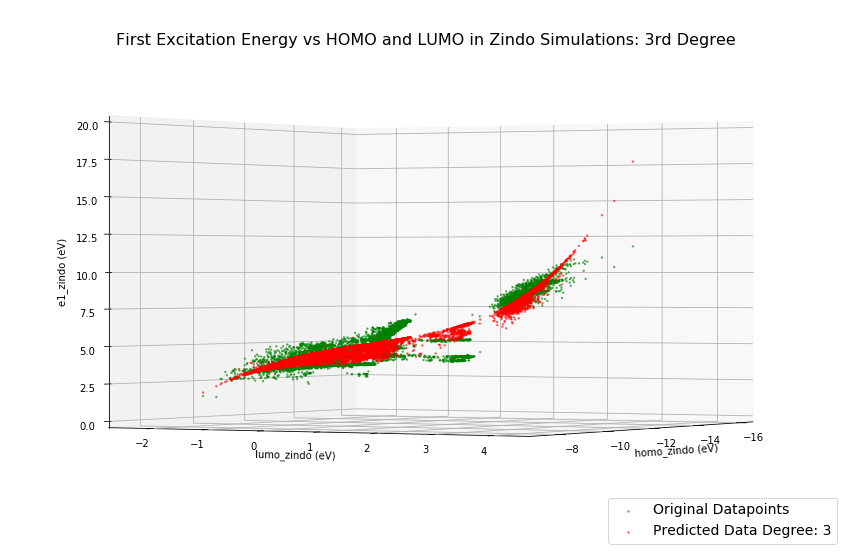

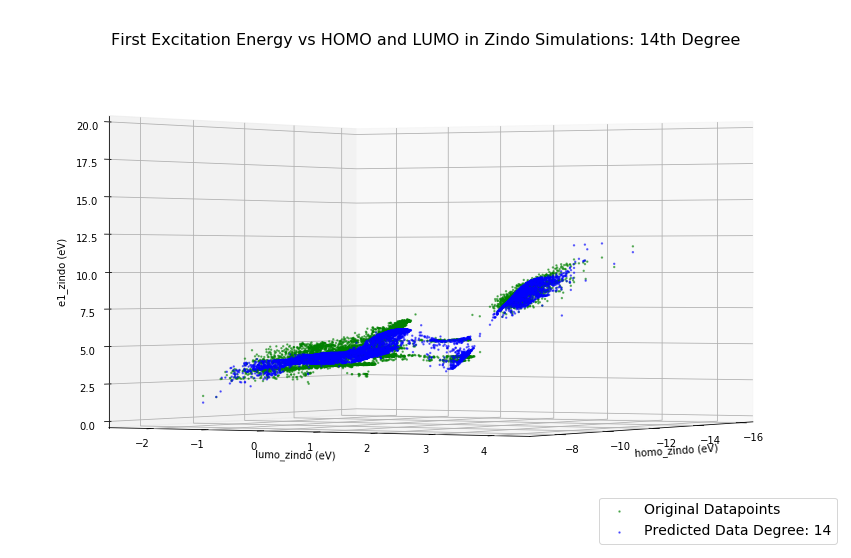

In [97]:
#Original Data
plt.figure(figsize=(15,10))
ax = plt.axes(projection = '3d',zlim = [0,20])
plot1=ax.scatter3D(qm7b['homo_zindo'], qm7b['lumo_zindo'], qm7b['e1_zindo'], s=2, alpha=0.5, 
                   label = 'Original Datapoints', color ='g')
ax.view_init(0,30)
ax.set_xlabel('homo_zindo (eV)')
ax.set_ylabel('lumo_zindo (eV)')
ax.set_zlabel('e1_zindo (eV)')
ax.set_title('First Excitation Energy vs HOMO and LUMO in Zindo Simulations: 3rd Degree', fontsize = 16)


#Part A - Polynomial Fitting on 3D Axis to a Degree of My Choice 
poly_model3D = make_pipeline(PolynomialFeatures(3),
                           LinearRegression())

X3 = qm7b[['homo_zindo','lumo_zindo']]
y3 = qm7b['e1_zindo']
poly_model3D.fit(X3,y3)
plot3D=ax.scatter3D(qm7b[['homo_zindo']], qm7b[['lumo_zindo']],
                   poly_model3D.predict(qm7b[['homo_zindo','lumo_zindo']]), s=2, alpha = 0.5,
                   label='Predicted Data Degree: 3',  c='red')
plt.legend(loc = 'lower right', fontsize = 14)

#Part B - Testing if this is an improved fitting
print('R2 Score of Linear Model = 0.757')
print('R2 Score of 3rd Degree Polynomial Fitting (top graph) = ' + str(r2_score(y3, poly_model3D.predict(qm7b[['homo_zindo','lumo_zindo']]))))
print('Yes, this is a better fitting than the linear one from Hands on 5')
print()

#Part C&D - Testing which degree gives best fitting and plotting it

plt.figure(figsize=(15,10))
ax = plt.axes(projection = '3d',zlim = [0,20])
plot1=ax.scatter3D(qm7b['homo_zindo'], qm7b['lumo_zindo'], qm7b['e1_zindo'], s=2, alpha=0.5, 
                   label = 'Original Datapoints', color ='g')
ax.view_init(0,30)
ax.set_xlabel('homo_zindo (eV)')
ax.set_ylabel('lumo_zindo (eV)')
ax.set_zlabel('e1_zindo (eV)')
ax.set_title('First Excitation Energy vs HOMO and LUMO in Zindo Simulations: 14th Degree', fontsize = 16)

#Change the i integer value and take note of the changing R value. 
# Degree of i=14 gives the highest R Value 
i = 14

poly_model3D = make_pipeline(PolynomialFeatures(i),
                           LinearRegression())

X3 = qm7b[['homo_zindo','lumo_zindo']]
y3 = qm7b['e1_zindo']
poly_model3D.fit(X3,y3)
plot3D=ax.scatter3D(qm7b[['homo_zindo']], qm7b[['lumo_zindo']],
                   poly_model3D.predict(qm7b[['homo_zindo','lumo_zindo']]), s=2, alpha = 0.5,
                   label='Predicted Data Degree: '+str(i),  c='blue')
plt.legend(loc = 'lower right', fontsize = 14)

print('R2 Score of 14th Degree Polynomial Fitting (bottom graph) ' +str(i)+ ' = ' + str(r2_score(y3, poly_model3D.predict(qm7b[['homo_zindo','lumo_zindo']]))))
print('This is the best polynomial fitting we can get with degree under 30.')
print()